<a href="https://colab.research.google.com/github/HarshalJagdale1747/CKD_detection_using_ML/blob/main/CKD_using_AIML_SW(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [21]:
# Reading Dataset:
dataset = pd.read_csv("/content/sample_data/Kidney_data.csv")
# Top 5 records:
dataset.head()
"""file_id = "1Wr6diSfaRSfW8PvLdAoz8q-TcTeBto3Y"  # correct full ID
download_link = f"https://drive.google.com/uc?id={file_id}"

import pandas as pd
try:
    dataset = pd.read_csv(download_link)
except pd.errors.ParserError:
    try:
        dataset = pd.read_csv(download_link, delimiter=';')
    except pd.errors.ParserError:
        try:
            dataset = pd.read_csv(download_link, delimiter='\t')
        except pd.errors.ParserError:
            print("Could not parse the CSV with different delimiters.")
print(dataset.head())"""

'file_id = "1Wr6diSfaRSfW8PvLdAoz8q-TcTeBto3Y"  # correct full ID\ndownload_link = f"https://drive.google.com/uc?id={file_id}"\n\nimport pandas as pd\ntry:\n    dataset = pd.read_csv(download_link)\nexcept pd.errors.ParserError:\n    try:\n        dataset = pd.read_csv(download_link, delimiter=\';\')\n    except pd.errors.ParserError:\n        try:\n            dataset = pd.read_csv(download_link, delimiter=\'\t\')\n        except pd.errors.ParserError:\n            print("Could not parse the CSV with different delimiters.")\nprint(dataset.head())'

In [22]:
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)

In [23]:
# Shape of dataset:
dataset.shape

(400, 25)

In [24]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

,0
age,9
bp,12
sg,47
al,46
su,49
rbc,152
pc,65
pcc,4
ba,4
bgr,44


In [25]:
# Description:
dataset.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [26]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [27]:
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,object
pcc,object
ba,object
bgr,float64


In [28]:
dataset['rbc'].value_counts()

,count
rbc,
normal,201
abnormal,47


In [29]:
dataset['pc'].value_counts()

,count
pc,
normal,259
abnormal,76


In [30]:
dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

/tmp/ipython-input-803850354.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pc'] = dataset['pc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


In [31]:
dataset['pcc'].value_counts()

,count
pcc,
notpresent,354
present,42


In [32]:
dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})

/tmp/ipython-input-3196457339.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pcc'] = dataset['pcc'].replace(to_replace = {'notpresent':0,'present':1})


In [33]:
dataset['ba'].value_counts()

,count
ba,
notpresent,374
present,22


In [34]:
dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})

/tmp/ipython-input-2271382674.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ba'] = dataset['ba'].replace(to_replace = {'notpresent':0,'present':1})


In [35]:
dataset['htn'].value_counts()

,count
htn,
no,251
yes,147


In [36]:
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})

/tmp/ipython-input-2228437743.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [37]:
dataset['dm'].value_counts()

,count
dm,
no,258
yes,134
\tno,3
\tyes,2
yes,1


In [38]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'\tyes':'yes', ' yes':'yes', '\tno':'no'})



In [39]:
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})


/tmp/ipython-input-3886047398.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [40]:
dataset['cad'].value_counts()


,count
cad,
no,362
yes,34
\tno,2


In [41]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'\tno':'no'})

In [42]:
dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


/tmp/ipython-input-1046343113.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['cad'] = dataset['cad'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [43]:
dataset['appet'].unique()

array(['good', 'poor', nan], dtype=object)

In [44]:
dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})

/tmp/ipython-input-374170606.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['appet'] = dataset['appet'].replace(to_replace={'good':1,'poor':0,'no':np.nan})


In [45]:
dataset['pe'].value_counts()

,count
pe,
no,323
yes,76


In [46]:
dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})

/tmp/ipython-input-166025595.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['pe'] = dataset['pe'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [47]:
dataset['ane'].value_counts()

,count
ane,
no,339
yes,60


In [48]:
dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})

/tmp/ipython-input-1781658938.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['ane'] = dataset['ane'].replace(to_replace = {'yes' : 1, 'no' : 0})


In [49]:
dataset['classification'].value_counts()

,count
classification,
ckd,248
notckd,150
ckd\t,2


In [50]:
dataset['classification'] = dataset['classification'].replace(to_replace={'ckd\t':'ckd'})

In [51]:
dataset["classification"] = [1 if i == "ckd" else 0 for i in dataset["classification"]]

In [52]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,0.0,0.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,NaN,0.0,0.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,normal,0.0,0.0,0.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,normal,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,normal,0.0,0.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


In [53]:
# Datatypes:
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,float64
pcc,float64
ba,float64
bgr,float64


In [54]:
dataset['pcv'] = pd.to_numeric(dataset['pcv'], errors='coerce')
dataset['wc'] = pd.to_numeric(dataset['wc'], errors='coerce')
dataset['rc'] = pd.to_numeric(dataset['rc'], errors='coerce')

In [55]:
# Datatypes:
dataset.dtypes

,0
age,float64
bp,float64
sg,float64
al,float64
su,float64
rbc,object
pc,float64
pcc,float64
ba,float64
bgr,float64


In [56]:

# Description:
dataset.describe()

,age,bp,sg,al,su,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,391.000000,388.000000,353.000000,354.000000,351.000000,335.000000,396.000000,396.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000,398.000000,398.000000,398.000000,399.000000,399.000000,399.000000,400.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.226866,0.106061,0.055556,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435,0.369347,0.344221,0.085427,0.794486,0.190476,0.150376,0.625000
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.419431,0.308305,0.229351,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323,0.483235,0.475712,0.279868,0.404584,0.393170,0.357888,0.484729
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,0.000000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,0.000000,0.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [57]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum().sort_values(ascending=False)

,0
rbc,152
rc,131
wc,106
pot,88
sod,87
pcv,71
pc,65
hemo,52
su,49
sg,47


In [58]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [59]:
features = ['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
           'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
           'appet', 'pe', 'ane']

In [60]:
for feature in features:
    if dataset[feature].dtype != 'object':
        dataset[feature] = dataset[feature].fillna(dataset[feature].median())
    else:
        dataset[feature] = dataset[feature].fillna(dataset[feature].mode()[0])

In [61]:
dataset.isnull().any().sum()

np.int64(0)

/tmp/ipython-input-552760356.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})


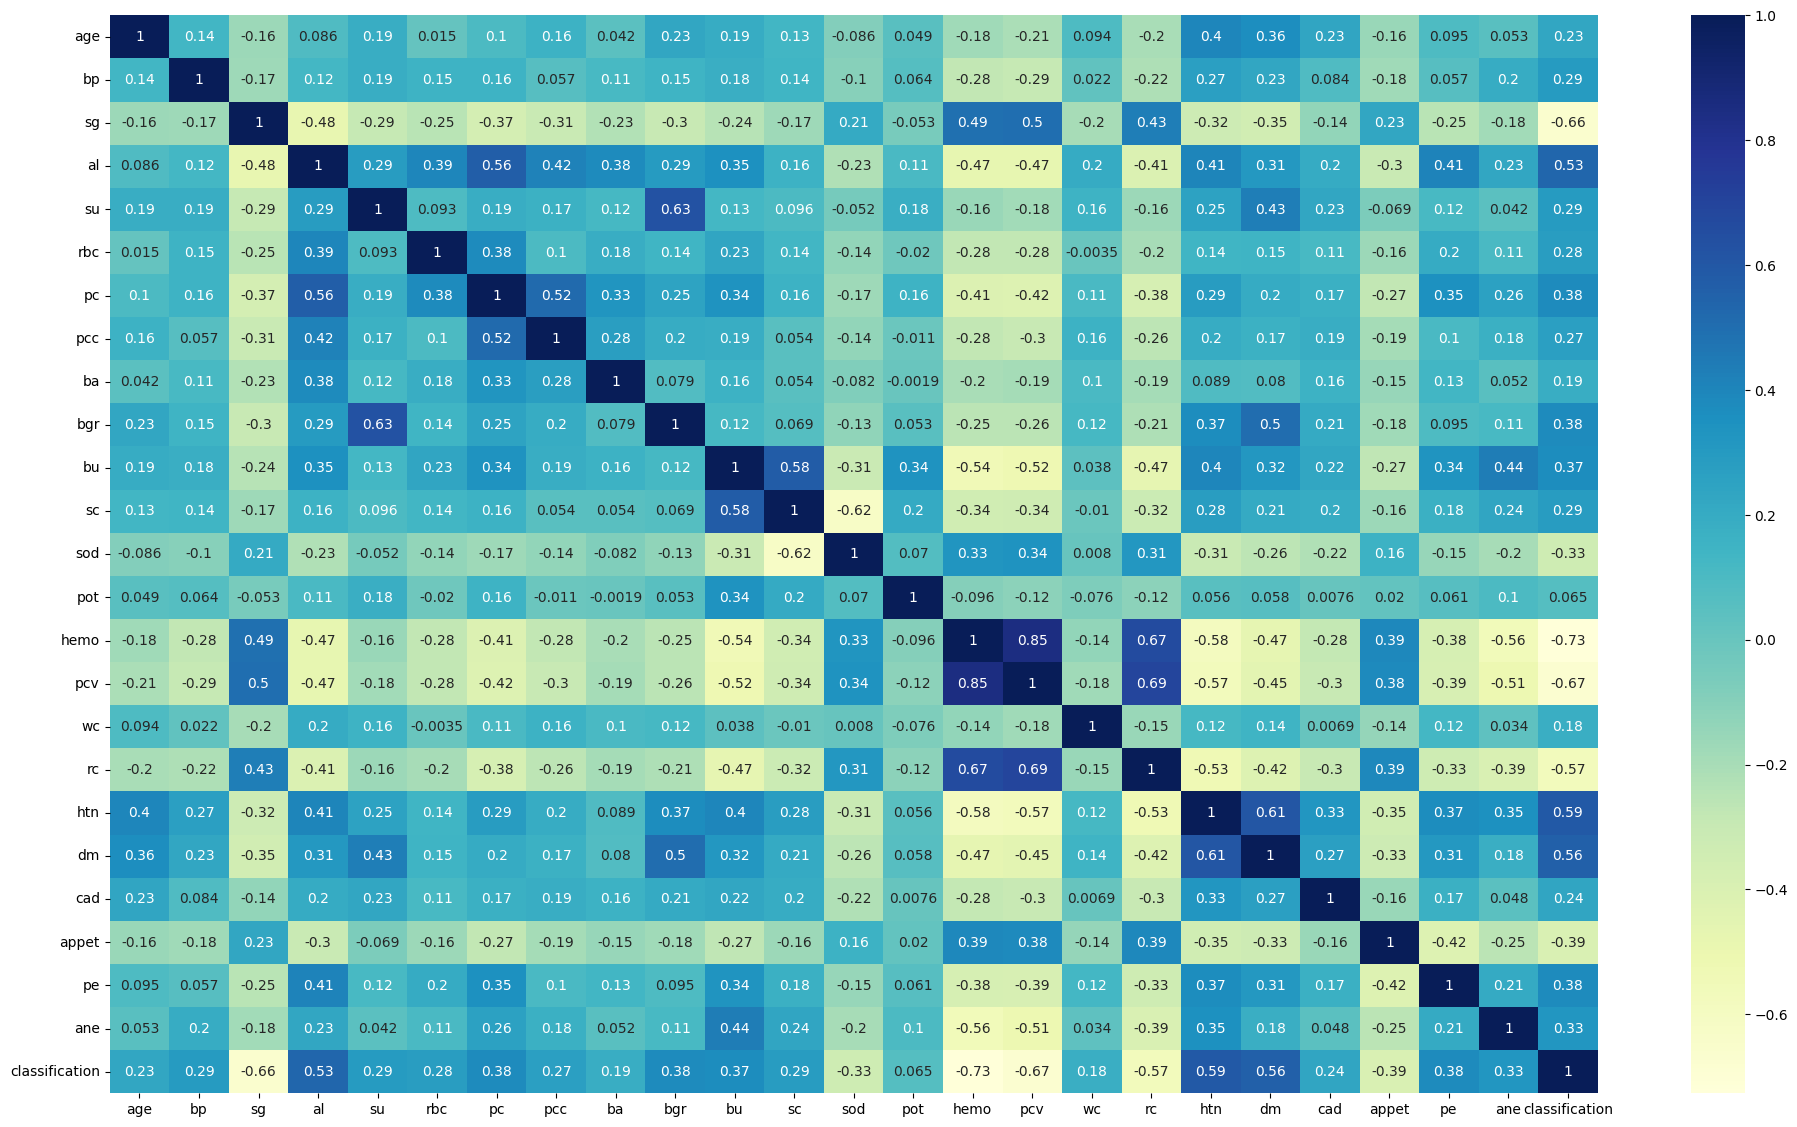

In [63]:
# Encode the 'rbc' column to numeric values
dataset['rbc'] = dataset['rbc'].replace(to_replace = {'normal' : 0, 'abnormal' : 1})

plt.figure(figsize=(24,14))
sns.heatmap(dataset.corr(numeric_only=True), annot=True, cmap='YlGnBu')
plt.show()

In [64]:
dataset.drop('pcv', axis=1, inplace=True)

In [65]:
dataset.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0,1
1,7.0,50.0,1.020,4.0,0.0,0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0,1
2,62.0,80.0,1.010,2.0,3.0,0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0,1
3,48.0,70.0,1.005,4.0,0.0,0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0,1
4,51.0,80.0,1.010,2.0,0.0,0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0,1


<Axes: ylabel='count'>

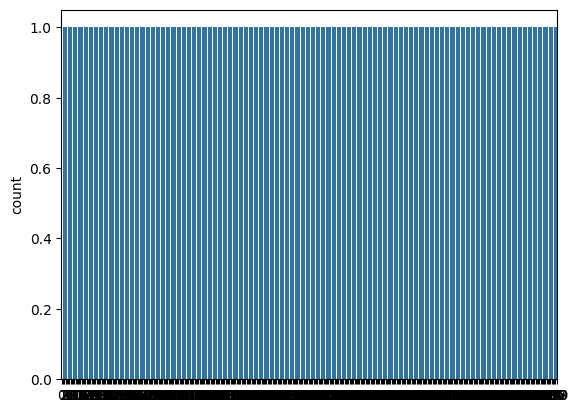

In [66]:
# Target feature:
sns.countplot(dataset['classification'])

In [67]:
# Independent and Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [68]:
X.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0,0.0,0.0,0.0,121.0,36.0,1.2,138.0,4.4,15.4,7800.0,5.2,1.0,1.0,0.0,1.0,0.0,0.0
1,7.0,50.0,1.020,4.0,0.0,0,0.0,0.0,0.0,121.0,18.0,0.8,138.0,4.4,11.3,6000.0,4.8,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,80.0,1.010,2.0,3.0,0,0.0,0.0,0.0,423.0,53.0,1.8,138.0,4.4,9.6,7500.0,4.8,0.0,1.0,0.0,0.0,0.0,1.0
3,48.0,70.0,1.005,4.0,0.0,0,1.0,1.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,6700.0,3.9,1.0,0.0,0.0,0.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,0,0.0,0.0,0.0,106.0,26.0,1.4,138.0,4.4,11.6,7300.0,4.6,0.0,0.0,0.0,1.0,0.0,0.0


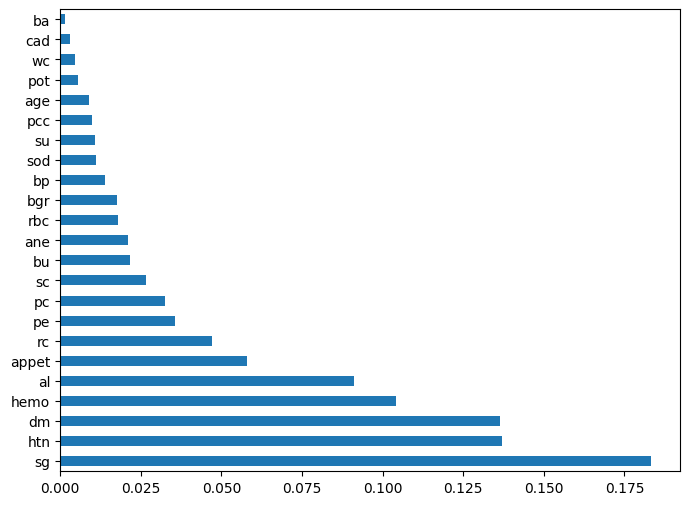

In [69]:
# Feature Importance:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(X,y)

plt.figure(figsize=(8,6))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(24).plot(kind='barh')
plt.show()

In [70]:
ranked_features.nlargest(8).index

Index(['sg', 'htn', 'dm', 'hemo', 'al', 'appet', 'rc', 'pe'], dtype='object')

In [71]:
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]
X.head()

,sg,htn,hemo,dm,al,appet,rc,pc
0,1.020,1.0,15.4,1.0,1.0,1.0,5.2,0.0
1,1.020,0.0,11.3,0.0,4.0,1.0,4.8,0.0
2,1.010,0.0,9.6,1.0,2.0,0.0,4.8,0.0
3,1.005,1.0,11.2,0.0,4.0,0.0,3.9,1.0
4,1.010,0.0,11.6,0.0,2.0,1.0,4.6,0.0


In [72]:
X.tail()

,sg,htn,hemo,dm,al,appet,rc,pc
395,1.020,0.0,15.7,0.0,0.0,1.0,4.9,0.0
396,1.025,0.0,16.5,0.0,0.0,1.0,6.2,0.0
397,1.020,0.0,15.8,0.0,0.0,1.0,5.4,0.0
398,1.025,0.0,14.2,0.0,0.0,1.0,5.9,0.0
399,1.025,0.0,15.8,0.0,0.0,1.0,6.1,0.0


In [73]:
y.head()

,classification
0,1
1,1
2,1
3,1
4,1


In [74]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)

In [75]:
print(X_train.shape)
print(X_test.shape)

(280, 8)
(120, 8)


In [76]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics

In [77]:
# Initialzing empty lists to append all model's name and corresponding name
acc = []
model = []

In [78]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier

# Convert 'htn' and 'dm' columns to numeric
dataset['htn'] = dataset['htn'].replace(to_replace = {'yes' : 1, 'no' : 0})
dataset['dm'] = dataset['dm'].replace(to_replace = {'yes' : 1, 'no' : 0})

# Re-select features after converting 'htn' and 'dm'
X = dataset[['sg', 'htn', 'hemo', 'dm', 'al', 'appet', 'rc', 'pc']]

# Re-split the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=33)


RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('RF')

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [79]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('ADB')

Accuracy: 0.9666666666666667
[[55  3]
 [ 1 61]]


In [80]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)

acc.append(x)
model.append('GB')

Accuracy: 0.975
[[55  3]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        58
           1       0.95      1.00      0.98        62

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [81]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression()
LogisticRegression=LogisticRegression.fit(X_train,y_train)

# Predictions:
y_pred = LogisticRegression.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('LR')

Accuracy: 0.925
[[54  4]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.92      0.93      0.92        58
           1       0.93      0.92      0.93        62

    accuracy                           0.93       120
   macro avg       0.92      0.93      0.92       120
weighted avg       0.93      0.93      0.93       120



In [82]:
from sklearn.naive_bayes import GaussianNB
GaussianNB=GaussianNB()
GaussianNB=GaussianNB.fit(X_train,y_train)

# Predictions:
y_pred = GaussianNB.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('NB')

Accuracy: 0.95
[[58  0]
 [ 6 56]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95        58
           1       1.00      0.90      0.95        62

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [83]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn=knn.fit(X_train, y_train)

# Predictions:
y_pred = knn.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('KNN')

Accuracy: 0.9333333333333333
[[55  3]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.92      0.95      0.93        58
           1       0.95      0.92      0.93        62

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



In [84]:
from sklearn.svm import SVC
svm= SVC(kernel = 'linear', random_state = 0)
svm=svm.fit(X_train, y_train)

# Predictions:
y_pred = svm.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('SVM')

Accuracy: 0.9416666666666667
[[55  3]
 [ 4 58]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.95      0.94      0.94        62

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [85]:
from sklearn.svm import SVC
ksvm = SVC(kernel = 'rbf', random_state = 0)
ksvm=ksvm.fit(X_train, y_train)

# Predictions:
y_pred = ksvm.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('kSVM')

Accuracy: 0.9
[[51  7]
 [ 5 57]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        58
           1       0.89      0.92      0.90        62

    accuracy                           0.90       120
   macro avg       0.90      0.90      0.90       120
weighted avg       0.90      0.90      0.90       120



In [86]:
from sklearn import tree
tree=tree.DecisionTreeClassifier()
dtree=tree.fit(X_train,y_train)

# Predictions:
y_pred = dtree.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

x = metrics.accuracy_score(y_test, y_pred)
acc.append(x)
model.append('DB')

Accuracy: 1.0
[[58  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        62

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



/tmp/ipython-input-2464031616.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = acc,y = model,palette='dark')


<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

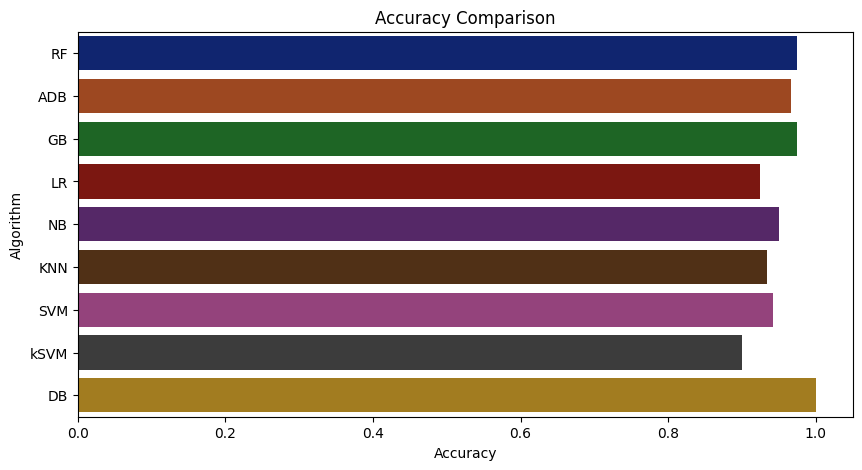

In [87]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [88]:
import pickle
with open("Kidney_model.pkl","wb") as file:
    pickle.dump(dtree,file)

In [89]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=2000, num=18)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]
min_samples_split = [2, 5, 10, 15, 20,25]
min_samples_leaf = [1, 2, 5, 10,12,15]
params = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

In [90]:
from  sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
tuned_model = RandomizedSearchCV(rf, params,
                            cv=5, n_iter=20, random_state=43, n_jobs=-1)

In [79]:
tuned_model.fit(X_train, y_train)

ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'sqrt', 'log2'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
54 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_param_validation.py", line 98, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.

--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/ensemble/_forest.py", line 360, in fit
    X, y = validate_data(
           ^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 2961, in validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1370, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py", line 1055, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/sklearn/utils/_array_api.py", line 839, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pandas/core/generic.py", line 2153, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'yes'


In [91]:
#Printing Best Parameter during tunning
print(tuned_model.best_estimator_)

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_estimator_'

In [92]:
RF = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=435,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RF = RF.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

TypeError: RandomForestClassifier.__init__() got an unexpected keyword argument 'min_impurity_split'

In [93]:
import pickle
with open("tunned_kidney_Cancer_model.pkl","wb") as file:
    pickle.dump(RF,file)


NameError: name 'RF' is not defined